# Are houses along the Charles River in Boston worth more than those that are not and can you predict the median house price in Boston?

***

Before I get into any project, I like to import all the libraries I will be using.

In [31]:
### import libraries necessary for the project

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.weightstats as ws
import matplotlib.pyplot as plt
import keras as kr
import seaborn as sns

## PROJECT OBJECTIVE

This project will attempt to answer two questions: 
        1. Is there a significant difference in median house prices between houses that are along Boston's Charles river and those that are not?
        2. Is it possible to accurately predict the median house price in Boston?

To determine whether there is a significant difference in median house prices between those that are along the Charles river and those that are not, I will utilize inferential statistics.

I will use keras to aid me in building a neural network to predict the median house price.

The project will be broken into 3 sections:
    Section 1 : A general description of the Boston House Price dataset with the use of some descriptive statistics and plots.
    Section 2 : To find out if there is a significant difference between the median price of a house along the Charles river and houses that are not through the use of inferential statistics.
    Section 3 : To create a method that will allow the prediction of the median home price utilizing keras. 

All this will be done with the use of the BostonHouse Prices dataset.

***

### SECTION 1. THE BOSTON HOUSE PRICES DATASET

The Boston House Prices dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusettes. The dataset consists of 506 samples across 14 variables (columns). Please see below for a description of the 14 variables.


#### Boston Housing Dataset Columns


- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tractbounds river; 0 otherwise).
- NOX: Nitric oxide concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built prior to 1940.
- DIS: Weighted distances to five Boston employme.=nt centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per 10,000 USD.
- PTRATIO: Pupil-teacher ratio by town.
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town.
- LSTAT: Percentage of lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000s.

I could not find out exactly why the Boston House Price dataset is so popular especially with early learners of regression and machine learning, but I suppose it's because the dataset is very manageable. It is not loaded with alot of data and the data is very clean.
To get an idea of what is in the dataset, I will import the dataset via csv file and printout the first 5 lines.

In [32]:
### CSV module is a built-in function that allows Python to parse these csv types of files.
### use the import function to import the 'real' data set.

import csv

In [33]:
### use open function to open the file with the data.

a = open("bostonhousing.csv")

In [34]:
### The reader object allows iteration, much like a regular file object does. This allows for iteration over each row 
### in the reader object and the print out of the line of data, minus the commas. This works because each row is a list
### and we can join each element in the list together, forming one long string.[6]
### This is done for the complete dataset.
### df = pd.read_csv("bostonhousing.csv") creates the data frame for the data set.
### The df.head() function gives us the first five lines of the data set.

csv_a=csv.reader(a)
df = pd.read_csv("bostonhousing.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### SECTION 2. MEDIAN HOUSE PRICE DIFFERENCE

You'll notice in the dataset, that the CHAS column is filled with either a 0 or a 1. 0 means that the house is not on the Charles River and 1 means that it is on the Charles River. This is important because this will help us to answer our first question, is the median value of a house along the Charles River more than one that is not?

In [36]:
o = df[df['CHAS'] == 1.0]
n = df[df['CHAS'] == 0.0]

In [37]:
# calculate the means
nA = len(o)
nB = len(n)
print('The number of houses on the Charles River is:',(nA))
print('----------------')
print('The number of houses NOT on the Charles River is:',(nB))
print('----------------')
mo = np.mean(o.MEDV)
mn = np.mean(n.MEDV)
print('The mean price for a house on the Charles River is:',(mo))

print('----------------')
print('The mean price for a house NOT on the Charles River is:',(mn))
df.describe()

The number of houses on the Charles River is: 34
----------------
The number of houses NOT on the Charles River is: 452
----------------
The mean price for a house on the Charles River is: 28.826470588235296
----------------
The mean price for a house NOT on the Charles River is: 22.215044247787635


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


I want to see the distribution of the median house value.
The way I will do this is to use a distibution plot using the seaborn library.




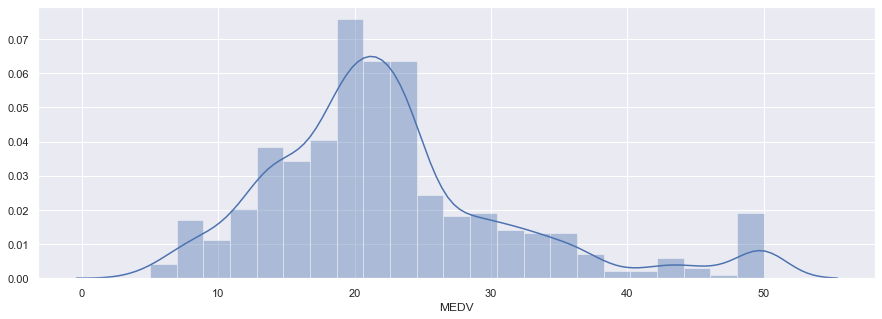

In [41]:
sns.set(rc={'figure.figsize':(15.0,5.0)})
sns.distplot(df['MEDV'])
plt.show()

# INFER

temporary section guideline notes :
1. use inferential stats to analyse whether there is a significant difference in median house prices between houses that are along the Charles river vs those that are not.
2. explain and discuss my findings (ie  

I will use inferential statistics to analyse whether there is a significant difference in the median house prices
that are along the Charles River verse those that aren't. More specifically, I will use a t-test.
"A t-test is a parametric test which tells you how significant the differences between group sare;In other words, 
it lets you know if those differences(measured in means/averages) could have happened by chance." (1)

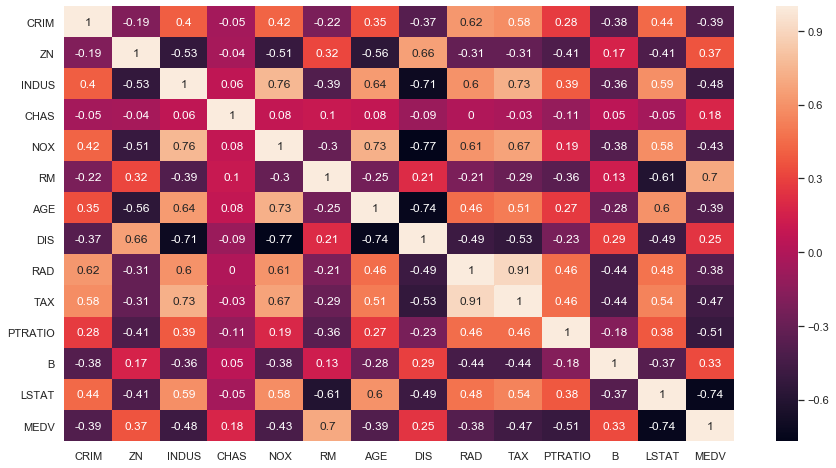

In [39]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [30]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (15.0, 15.0)

# what statistics do you want to use?

In [43]:
print(stats.ttest_ind(o['MEDV'], n['MEDV']))

Ttest_indResult(statistic=4.0579276717243715, pvalue=5.771528121432793e-05)


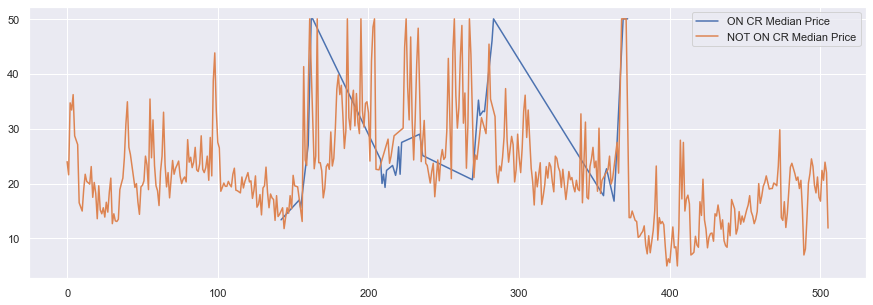

In [42]:
plt.plot(o['MEDV'], label='ON CR Median Price')
plt.plot(n['MEDV'], label='NOT ON CR Median Price')

plt.legend()

plt.show()


# PREDICT

temporary section guideline notes :
1. use keras to create a neural network that can predict the median house price based on the other variables in the dataset. (Feel free to interpret this as I wish. ie. use all the other variables or use a subset.)

In [7]:
# make plot bigger
plt.rcParams['figure.figsize'] = 10, 10

In [8]:
# create a neural network
m = kr.models.Sequential()

# add a single neuron in a single layer, with weight 1 and bias 0.
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# compile the model
m.compile(loss="mean_squared_error", optimizer="sgd")

In [11]:
# create some input values
x = np.arange(0.0, 10.0, 1)

# run each x value through the neural network
y = m.predict(x)

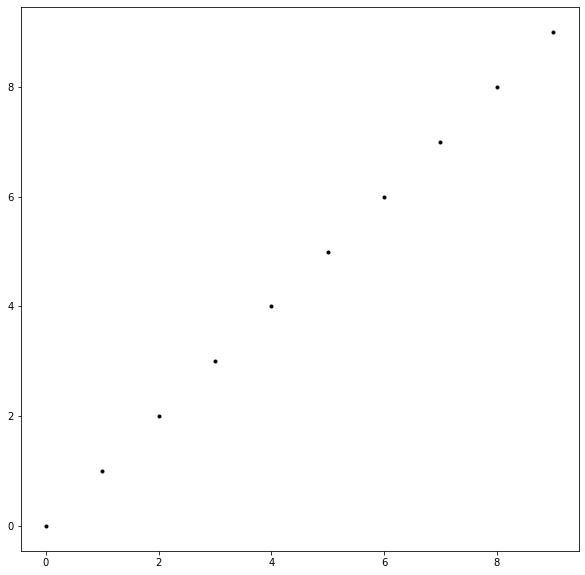

In [12]:
# plot the values
plt.plot(x, y, 'k.')

## REFERENCES

1. https://towardsdatascience.com/hypothesis-testing-using-t-test-inferential-statistics-part3-6fb43683bc32